Matias Medrano Ascencio

Jueves 28 de septiembre del 2023

# Examen A Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy` (37 puntos)

**Costo mínimo**. Imagine dos contenedores cilíndricos sin tapa que deben satisfacer las siguientes condiciones:

- El primer contenedor tiene el doble de altura que el segundo.
- La altura del primer contenedor (el de mayor tamaño) es el doble de su radio.
- El material para la base cuesta 10.00 MXN por cada $m^2$.
- El material para los lados cuesta 6.00 MXN por cada $m^2$.

¿Cuál es el costo del contenedor más barato?


1. Escriba el volumen $V_1(r_1)$ y $V_2(r_2, r_1)$ de ambos contenedores como dos funciones distintas, donde $r_1$ es el radio del primer contenedor y $r_2$ es el radio del segundo. Realice este punto usando $\LaTeX$ y celdas *Markdown*.

Definimos la altura del primer contendedor (el más alto) como 2h y la altura del segundo contenedor como h. Por ende, si la altura del segundo contenedor (2h) es el doble del radio ($2r_1$), concluimos que 
$$ h = r_1 $$

$$ V_1(r_1) = \pi r_1^2 (2h) $$

$$ V_1(r_1) = 2\pi r_1^2 r_1 = 2\pi r_1^3 $$

$$ V_2(r_2, r_1) = \pi r_2^2 (h) $$

$$ V_2(r_2, r_1) = \pi r_2^2 (r_1) $$

2. Escriba el costo **C** de fabricar ambos contenedores como una función de los radios de las bases. Realice este punto usando $\LaTeX$ y celdas *Markdown*.

El costo se basa en los metros cuadrados de superficie de la base y lados de cada contenedor. Cada metro cuadrado de la base cuesta 10 pesos, por lo que multiplicamos este 10 por la fórmula del área de un círculo ($\pi r^2 $). Para la superficie de los lados multiplicamos la altura de cada cilindro por la circunferencia de cada círculo ($2\pi r $).

Tomamos en cuenta que $h = r_1$

$$ C(r_1,r_2) = 10 \pi r_1^2 + 10 \pi r_2^2 + 6 (2h)\pi (2) r_1 + (h)6 \pi (2) r_2 $$

$$ C(r_1,r_2) = 10 \pi r_1^2 + 10 \pi r_2^2 + 6 (2r_1)\pi (2) r_1 + (r_1)6 \pi (2) r_2 $$

$$ C(r_1,r_2) = 10 \pi r_1^2 + 10 \pi r_2^2 + 24 \pi r_1^2 + 12 \pi r_2 r_1 $$

3. Determina las dimensiones de los contenedores si el volumen del contenedor pequeño debe ser de $12m^3$ y el costo debe ser mínimo.

$$ V_2(r_2, r_1) = \pi r_2^2 (r_1) = 12 $$

Despejamos $r_1$ en términos de $r_2$ para poder sustituir en fórmula de costo.

$$ r_1 = \frac{12}{\pi r_2^2} $$

$$ C(r_2) = 10 \pi (\frac{12}{\pi r_2^2})^2 + 10 \pi r_2^2 + 24 \pi (\frac{12}{\pi r_2^2})^2 + 12 \pi r_2 (\frac{12}{\pi r_2^2}) $$

In [2]:
import numpy as np
import sympy as sp

sp.var("r")

def f(r):
    return 10*np.pi*(12/(np.pi*r**2))**2 + 10*np.pi*r**2 + 24*np.pi*(12/(np.pi*r**2))**2 + 12*np.pi*r**2*(12/(np.pi*r**2))

dr = sp.diff(f(r), r)

pc = sp.solve(dr,r)
for c in pc:
    print(c)

-2.15160201947749
2.15160201947749
-1.07580100973874 - 1.86334200770141*I
-1.07580100973874 + 1.86334200770141*I
1.07580100973874 - 1.86334200770141*I
1.07580100973874 + 1.86334200770141*I


En este caso solamente existe un número real posible, por lo que ignoraremos el resto y tomaremos ese punto crítico.

In [3]:
ddr = sp.diff(dr, r)
ddr

62.8318530717959 + 31168.9040551168/r**6

In [5]:
crit_2da_derivada = ddr.subs(r, pc[1])
print(crit_2da_derivada)

376.991118430775


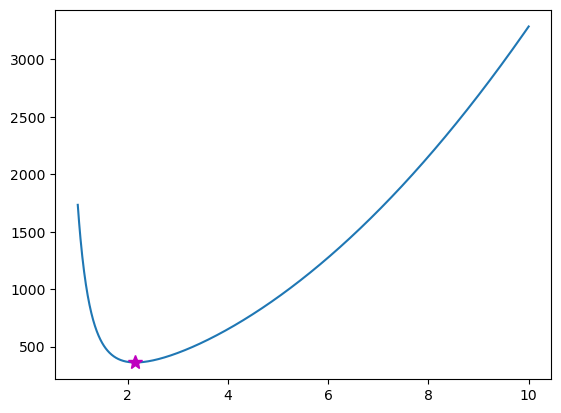

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

xn = np.linspace(1,10,1000)

plt.figure()
plt.plot(xn, f(xn))
plt.plot(pc[1], f(pc[1]), "*m", ms=10)

Notamos que el único punto crítico real se encuentra en $ r_2 = 2.1516$. A partir de ello podemos despejar $r_1$ y $h$:

$$ r_1 = h = \frac{12}{\pi (2.1516)^2} = 0.8251 $$

$h$ es la altura del segundo contenedor, mientras que $2h$ es la altura del primer contenedor, o sea $1.6502$.

3. ¿Cuál fue el costo de fabricar este par de contenedores?

$$ C(2.1516) = 10 \pi (\frac{12}{(2.1516)^2 \pi})^2 + 10 (2.1516)^2 \pi + 24 \pi (\frac{12}{(2.1516)^2 \pi})^2 + 12 (2.1516) \pi (\frac{12}{(2.1516)^2 \pi}) $$

In [8]:
f(2.1516)

362.15492313501045

El costo mínimo de fabricar ambos contenedores es de 362.1549 MXN.

### Correcciones del ejercicio 1

El error fue que originalmente trate de despejar $r_1$ pero al momento de obtener los puntos críticos obtuve números imaginarios en la respuesta (cosa que igualmente ocurre ahora, pero decidí ignorar), por lo que en la entrega original del examen trate de despejar $r_2$, lo cual fue más tardado y complicado de explicar en código, dándome error.

Para corregirlo regresé a mi plan original de despejar $r_1$ y sustuirlo en la ecuación de costos. Ignoré los resultados imaginarios y solamente tomé en cuenta el dato real (2.1516). Esto logró funcionar ya que la gráfica y costo fueron resueltos con lógica, y logré completar el ejercicio.

Esto se puede evitar al analizar todas las respuestas de puntos críticos obtenidos y filtrándolos para saber si algun resultado es válido y otros se pueden ignorar. Es decir, no detenerse por resultados variados como estos, sino tomar aquellos que nos sirven y continuar.

---
# Segundo punto. Programación lineal (37 puntos)

Una empresa se dedica a fabricar tarjetas de control para automóviles, y están en su momento de planeación de compras anuales. Hay 3 proveedores que pueden proveer los componentes, cada uno a su propio precio.

<table>
  <tr>
      <th>  </th>
      <th>Proveedor 1</th>
      <th>Proveedor 2</th>
      <th>Proveedor 3</th>
      <th>Demanda</th>
  </tr>
  <tr>
      <th>Componente 1</th>
      <td>0.5</td>
      <td>0.6</td>
      <td>0.7</td>
      <td>15000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 2</th>
      <td>0.7</td>
      <td>0.5</td>
      <td>0.6</td>
      <td>20000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 3</th>
      <td>0.32</td>
      <td>0.54</td>
      <td>0.8</td>
      <td>12000</td>
  </tr>

  <tr style="border-bottom: 1px solid #000;">
      <th>Capacidad</th>
      <td> 21000 </td>
      <td> 16000 </td>
      <td> 16000 </td>
      <td>  </td>
  </tr>
</table>

El proveedor tiene restricciones de capacidad de fabricación del tipo de componentes, por lo que un proveedor no puede satisfacer nuestra demanda completa para cada componente.

Se desea conocer la cantidad que se debe comprar de cada componente a cada proveedor para gastar la menor cantidad de dinero posible, pero al mismo tiempo lograr satisfacer la demanda para poder continuar con la manufactura del producto.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(23 puntos)}
\end{equation}

$$ min_x 0.5x_{11} + 0.6x_{12} + 0.7x_{13} + 0.7x_{21} + 0.5x_{22} + 0.6x_{23} + 0.32x_{x31} + 0.54x_{32} + 0.8x_{33}$$

Variables sobre las que se tiene control:

- $ x_{11} $ es la cantidad de componentes 1 del proveedor 1 

- $ x_{12} $ es la cantidad de componentes 1 del proveedor 2 

- $ x_{13} $ es la cantidad de componentes 1 del proveedor 3 

- $ x_{21} $ es la cantidad de componentes 2 del proveedor 1 

- $ x_{22} $ es la cantidad de componentes 2 del proveedor 2 

- $ x_{23} $ es la cantidad de componentes 2 del proveedor 3 

- $ x_{31} $ es la cantidad de componentes 3 del proveedor 1 


- $ x_{32} $ es la cantidad de componentes 3 del proveedor 2 

- $ x_{33} $ es la cantidad de componentes 3 del proveedor 3

**Restricciones:**

Resticciones de demanda:

$ x_{11} + x_{12} + x_{13} = 15000 $

$ x_{21} + x_{22} + x_{23} = 20000 $

$ x_{31} + x_{32} + x_{33} = 12000 $

Restricciones de capacidad:

$ x_{11} + x_{21} + x_{31} \leq 21000 $

$ x_{12} + x_{22} + x_{32} \leq 16000 $

$ x_{13} + x_{23} + x_{33} \leq 16000 $

2. Resuelva el problema utilizando la función `linprog`. ¿Cómo debe ser la distribución de compras? ¿Cuánto dinero se necesita para satisfacer la demanda? (10 puntos)

In [4]:
import pandas as pd
import scipy.optimize as opt

c = np.array([0.5,
             0.6,
             0.7,
             0.7,
             0.5,
              0.6,
             0.32,
              0.54,
              0.8,
            ])

Aub = np.array([
    [1, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 1]
])

bub = np.array([21000,
                16000,
                16000])

Aeq = np.array([
    [1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1],
])

beq = np.array([15000,
                20000,
                12000])

opt.linprog(c, Aub, bub, Aeq, beq)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 22940.0
              x: [ 9.000e+03  0.000e+00  6.000e+03  0.000e+00  1.600e+04
                   4.000e+03  1.200e+04  0.000e+00  0.000e+00]
            nit: 6
          lower:  residual: [ 9.000e+03  0.000e+00  6.000e+03  0.000e+00
                              1.600e+04  4.000e+03  1.200e+04  0.000e+00
                              0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  3.000e-01
                              0.000e+00  0.000e+00  0.000e+00  1.200e-01
                              2.800e-01]
          upper:  residual: [       inf        inf        inf        inf
                                    inf        inf        inf        inf
                                    inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00  0

La cantidad de componentes queda de la siguiente manera:
- 9,000 componentes 1 del proveedor 1
- 0 componentes 1 del proveedor 2
- 6,000 componentes 1 del proveedor 3
- 0 componentes 2 del proveedor 1
- 16,000 componentes 2 del proveedor 2
- 4,000 componentes 2 del proveedor 3
- 12,000 componentes 3 del proveedor 1
- 0 componentes 3 del proveedor 2
- 0 componentes 3 del proveedor 3

Nuestra función de costos quedaría de la siguiente manera:

$$ 0.5(9000) + 0.7(6000) + 0.5(16000) + 0.6(4000) + 0.32(12000) = 22940 u.m. $$

### Correcciones del ejercicio 2

El error en este problema fue uno sencillo y de escritura, ya que en el examen original utilicé un vector de costos con  únicamente coeficientes 1, es decir, no tome en cuenta los verdaderos coeficientes de costo por componente por empresa, y asumí erróneamente al no checar el vector C que todos los componentes cuestan 1 MXN. 

Corregí dicho vector de costos, sustituyendo los 1s con los coeficientes verdaderos. Esto nos genera los datos reales buscados por el problema.

Este problema se puede evitar al tener mayor cuidado y atención a lo que copiamos y editamos dentro de un documento. Este error ocurrió ya que copié un ejercicio similar que ya tenía para ahorrarme la transcripción tardada de las matrices, y olvidé cambiar los datos del vector de costos.

# Tercer punto. Ajuste de curvas (36 puntos)

Utiliza el archivo adjunto en Canvas en el apartado que corresponde al examen.

Escribe tu número de expediente: 745136

Lee el archivo y extrae la siguiente información:
- $x$ es la primer columna del archivo
- $y$ es la columna correspondiente a los últimos dos dígitos de tu número de expediente + 1. E.g. mi expediente es $693871$; por lo tanto, debo usar la columna $72$.

In [2]:
import pandas as pd
data = pd.read_excel("E01-RegresionLineal.xlsx")

In [3]:
x = np.array(data[0])
y = np.array(data[37])

1. Ajuste los datos con polinomios de grados 1, 3, y 5. Muestre los errores de forma gráfica. ¿Qué polinomio se ajusta mejor?

In [4]:
m = len(y)

# y = b0 + b1*x 
beta = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
y_vector = np.reshape(y, [m, 1])

x2_factor = np.reshape(x**2, [m, 1])

# y = b0 + b1*x + b2*x**2 + b3*x**3
beta3 = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x_factor, x2_factor, x3_factor) )

x4_factor = np.reshape(x**4, [m, 1])

# y = b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4 + b5*x**5
beta5 = np.random.rand(6)
x5_factor = np.reshape(x**5, [m, 1])
X5 = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor, x5_factor) )

def funcion_de_costo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

In [5]:
import scipy.optimize as opt
import numpy as np

sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))
sol3 = opt.minimize(funcion_de_costo, beta3, args=(X3, y_vector))
sol5 = opt.minimize(funcion_de_costo, beta5, args=(X5, y_vector))

In [6]:
sol1.x

array([-3.60300857,  7.37777303])

In [7]:
sol3.x

array([-2.14969037,  5.49584685, -2.78014683,  2.06659419])

In [8]:
sol5.x

array([-1.7923205 ,  1.78536679,  6.02982404, -5.49033265,  2.4159962 ,
       -0.18959752])

In [9]:
def f1(x):
    return -3.60300857 + 7.37777304*x
def f2(x):
    return -2.14968984 + 5.49584408*x - 2.78014362*x**2 + 2.06659317*x**3
def f3(x):
    return  -1.79232419 +  1.78542469*x + 6.02961997*x**2 - 5.49006086*x**3 + 2.41584382*x**4 - 0.18956716*x**5

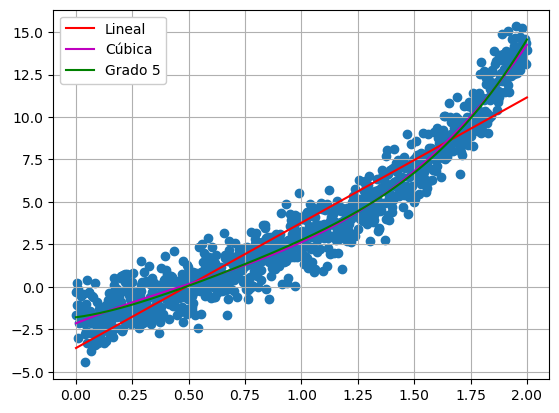

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.scatter(x, y)
plt.grid()
plt.plot(x, f1(x), "r", label = "Lineal")
plt.plot(x, f2(x), "m", label = "Cúbica")
plt.plot(x, f3(x), "g",label = "Grado 5")
plt.legend(framealpha=1, frameon=True)

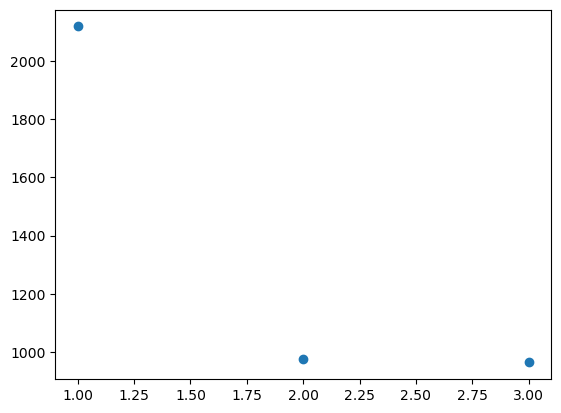

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter([1, 2, 3], [sol1.fun, sol3.fun, sol5.fun])

Al graficar los errores acumulados, notamos que el polinimio de grado 5 se ajusta ligeramente mejor a los datos que el polinomio de grado 3.

2. Muestre en un gráfico los datos y el polinomio que mejor se ajuste.

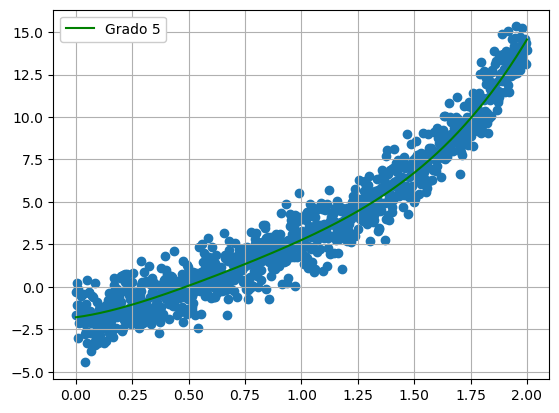

In [13]:
plt.figure()
plt.scatter(x, y)
plt.grid()
plt.plot(x, f3(x), "g",label = "Grado 5")
plt.legend(framealpha=1, frameon=True)

3. Use el modelo para averiguar el valor de $y$ cuando:
- $x=0.001$
- $x=-0.1$
- $x=2.1$

In [14]:
f3(0.001)

-1.7905327411776752

In [15]:
f3(-0.1)

-1.9048369183864

In [16]:
f3(2.1)

16.945696020750404

4. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación?

Los valores de la interpolación se encuentran sobre la función dentro del rango establecido, por lo que podemos notar que se encuentran dentro de la nube de puntos formada por los datos.
La extrapolación utiliza la función para estimar valores fuera del rango que sigan la tendencia establecida, por lo que son eso, estimaciones, que pueden contener mayores errores que las interpolaciones.

5. Agregue un factor $\cos{(10x)}$ a su modelo y grafique los resultados. ¿Mejoró el resultado?

In [20]:
m = len(y)

# y = b0 + b1*x 
beta = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
y_vector = np.reshape(y, [m, 1])

x2_factor = np.reshape(x**2, [m, 1])

# y = b0 + b1*x + b2*x**2 + b3*x**3
beta3 = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x_factor, x2_factor, x3_factor) )

x4_factor = np.reshape(x**4, [m, 1])

# y = b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4 + b5*x**5
beta5 = np.random.rand(6)
x5_factor = np.reshape(x**5, [m, 1])
X5 = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor, x5_factor) )

# y = b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4 + b5*x**5 + b6*cos(10*x)
beta6 = np.random.rand(7)
cos_factor = np.reshape(np.cos(10*x,), [m, 1])
X6 = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor, x5_factor, cos_factor) )

def funcion_de_costo(beta, X, y) :
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

In [22]:
sol6 = opt.minimize(funcion_de_costo, beta6, args=(X6, y_vector))

In [23]:
sol6.x

array([-1.71566342,  0.97540974,  8.21330676, -7.80890254,  3.46119411,
       -0.35509803, -0.06273272])

In [24]:
def f6(x):
    return  -1.71567108 +  0.97550455*x + 8.21301538*x**2 -7.80854829*x**3 + 3.46100836*x**4 -0.35506291*x**5 -0.06273197*np.cos(10*x)

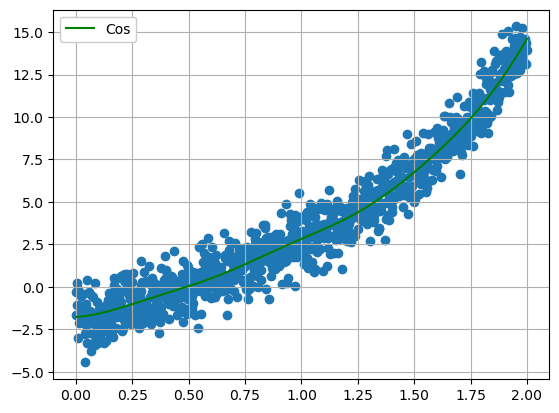

In [25]:
plt.figure()
plt.scatter(x, y)
plt.grid()
plt.plot(x, f6(x), "g",label = "Cos")
plt.legend(framealpha=1, frameon=True)